<a href="https://colab.research.google.com/github/hernansalinas/autogrades/blob/main/Laboratorios_Taller/Lab06_ec_variable.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Ecuaciones de una variable:

Para los siguiente problemas:


1.0 ¿Para que ángulo el area del segmento circular es igual a un cuarto del area de la circunferencia?

- Muestre que la expresión que permite resolver el problema:


\begin{equation}
\theta - \sin \theta = \frac{\pi}{2}
\end{equation}


- ¿Construya una grafica para theta?,  Alrededor de que punto esta solución.(Para este punto se recomienda emplear un data frame de pandas )

- Emplee el metodo de biseccion, punto fijo,  newton y secante  para comprobar la solución intuida del apartado anterior.




In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import optimize
from PIL import Image

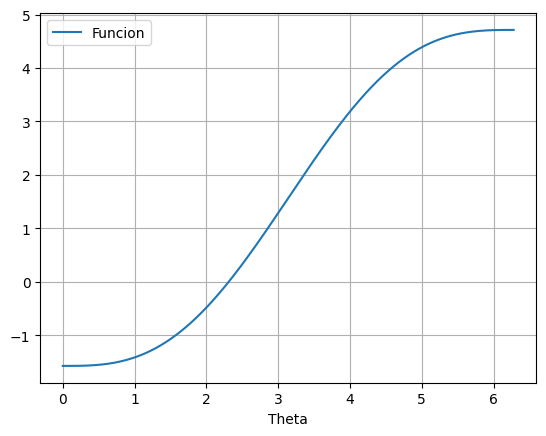

In [4]:
theta=lambda x: x-np.sin(x)-np.pi/2

x=np.arange(0,2*np.pi,0.01)
y=theta(x)

d={'Theta':x,'Funcion':y}

df=pd.DataFrame(d)

df.plot.line(x='Theta',y='Funcion')
plt.grid()

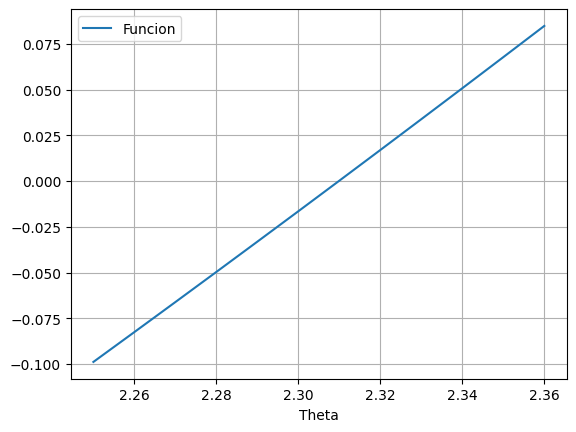

In [5]:
df_filtro=df[df.Funcion.between(-0.1,0.1)]
df_filtro.plot.line(x='Theta',y='Funcion')
plt.grid()

In [6]:
#Método de bisección

theta=lambda x: x-np.sin(x)-np.pi/2

rootb=optimize.bisect(theta,2.30,2.31,xtol=0.01)
rootb

2.3049999999999997

In [7]:
#Método de Newton-Raphson

theta=lambda x: x-np.sin(x)-np.pi/2
dtheta=lambda x: 1-np.cos(x)

rootn=optimize.newton(theta,2.30,dtheta,tol=0.01)
rootn

2.3099032445770553

In [8]:
#Método de punto fijo

fixed_theta=lambda x: x-theta(x)

rootf=optimize.fixed_point(fixed_theta,2.30,xtol=0.01)
rootf

array(2.30986699)

In [9]:
#Método de la secante

theta=lambda x: x-np.sin(x)-np.pi/2

rootsec=optimize.newton(theta,2.3,tol=0.01)
rootsec

2.309902513426311

2.0 An object falling vertically through the air is subjected to viscous resistance as well as to the force
of gravity. Assume that an object with mass m is dropped from a height s0 and that the height of the
object after t seconds is

\begin{equation}
s(t)=s_0 - \frac{mg}{k}t+\frac{m^2g}{k}t(1-e^{-kt/m})
\end{equation}

where $g = 32.17 ft/s2$ and $k$ represents the coefficient of air resistance in $lbs/ft$. Suppose $s0 = 300 ft$,
$m = 0.25$ lb, and $k = 0.1$ lbs/ft. Find, to within $0.01$ s, the time it takes this quarter-pounder to hit the
ground

- Emplee el metodo de biseccion, punto fijo,  newton y secante  para comprobrar la solución.






In [10]:
#Método de bisección

s0=300
m=0.25
g=32.17
k=0.1

s=lambda t: s0-(m*g/k)*t+(m**2*g/k)*t*(1-np.exp(-k*t/m))

rootb=optimize.bisect(s,4,5,xtol=0.01)
rootb

4.7421875

In [11]:
#Método de Newton-Raphson

s0=300
m=0.25
g=32.17
k=0.1

s=lambda t: s0-(m*g/k)*t+(m**2*g/k)*t*(1-np.exp(-k*t/m))
ds=lambda t: -m*g/k+m**2*g/k*((1-np.exp(-k*t/m))+k*t*np.exp(-k*t/m)/m)

rootn=optimize.newton(s,4,ds,tol=0.01)
rootn

4.736139132607082

In [12]:
#Método de punto fijo

s0=300
m=0.25
g=32.17
k=0.1

s=lambda t: s0-(m*g/k)*t+(m**2*g/k)*t*(1-np.exp(-k*t/m))
fixs=lambda t: t-s(t)

rootf=optimize.fixed_point(fixs,5,xtol=0.01)
rootf

array(4.7361375)

In [13]:
#Método de la secante

s=lambda t: s0-(m*g/k)*t+(m**2*g/k)*t*(1-np.exp(-k*t/m))

rootsec=optimize.newton(s,5,tol=0.01)
rootsec

4.7361391422431245

3.0 En la teoría de campo medio, La magnetización como función de la temperatura de un material magnético puede ser calculada como:

\begin{equation}
m(T) = \tanh\left( \frac{m(T)}{T} \right)
\end{equation}

donde m y T son la magnetización y temperatura reducida respectivamente

Para T = 0.5, determine:

a. La magnetización reducida empleando el método de la secante. (Muestre su resultado con 4 cifras)

b. Valide su respuesta con el metodo de punto fijo.
(Muestre su resultado con 4 cifras)

c. Defina T = np.linspace(0.1,0.99,100), y emplee el método de la secante para construir un gráfico de magnetización reducida como función de la temperatura para los 100 valores de T.





In [39]:
#a

f=lambda m: m-np.tanh(m/0.5)

rootsec=optimize.newton(f,0.4,tol=1e-4)
rootsec


0.9575040240666826

In [40]:
#b

ff=lambda m: m-f(m)

rootfix=optimize.fixed_point(ff,0.4,xtol=1e-4)
rootfix

array(0.95750402)

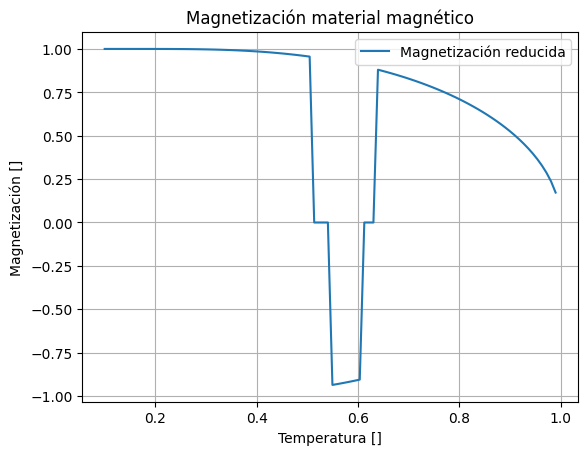

In [49]:
#c

T=np.linspace(0.1,0.99,100)
M=np.zeros(len(T))

for i in range(len(T)):
    f=lambda m: m-np.tanh(m/T[i])
    M[i]=optimize.newton(f,0.4)

plt.plot(T,M,label='Magnetización reducida')
plt.title('Magnetización material magnético')
plt.xlabel('Temperatura []')
plt.ylabel('Magnetización []')
plt.grid()
plt.legend()

4.0  Construir un fractal empleando el metodo de Newton-Raphson,
(Reproducir código y entender)
\begin{equation}
z_{n+1} = z_n -a \frac{f(z)}{f'(z)}
\end{equation}



\begin{equation}
f'(z) = \frac{ f(z+h)+f(z) }{h}
\end{equation}


Replicar el codigo y entender.


```

import numpy as np
import matplotlib.pylab as plt
from PIL import Image

Npx_X = 80 #Numero de pixeles en x
Npx_Y = 80 #Numero de pixeles en y

image = Image.new("RGB", (Npx_X, Npx_Y)) #Creacion de la imagen inicial

npx = np.arange(0, Npx_X)
npy = np.arange(0, Npx_Y)

xmin = -1
xmax = 1
ymin = -1
ymax = 1
#Transformación al plano complejo en un rectangulo (xmin, xmax), (ymin, ymax)
zx = npx * (xmax - xmin) / (Npx_X - 1)   + xmin
zy = npy * (ymax-ymin) / (Npx_Y - 1) + ymin

#Definicion  la funcion y las derivada
def f(z):
  return z**3 - 1

def fp(z):
  return 3*z**2

h = 1E-4
def fpn(z, h):
  return (f(z+h)-f(z))/h
  

a = 0.2
Niteraciones = 120
eps = 1E-8

x = - 1
for zx_ in zx:
  x = x + 1
  y = -1
  for zy_ in zy:
      y = y + 1
      Z_0 = complex(zx_, zy_)
    
      for i in range(0, Niteraciones):
        Z = Z_0 - a * f(Z_0)/fp(Z_0)

        if( abs(Z-Z_0)<= eps):
          break
          
        Z_0 = Z
      #print(i)
      #print(i)
      r, g, b = i % 4 *64 , i % 8 *16, i% 16* 16
      
      image.putpixel((x,y), (r,g,b) )


plt.imshow(image)
#plt.xlim(400, 600)
#plt.ylim(400, 523)
```

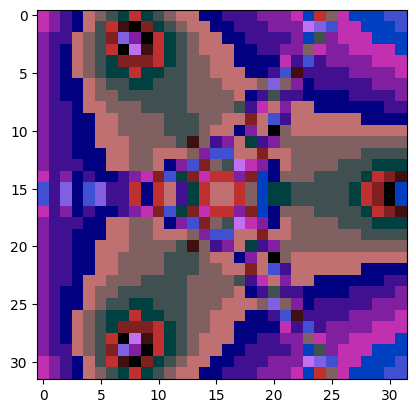

In [ ]:
import numpy as np
import matplotlib.pylab as plt
from PIL import Image

Npx_X = 32 #Numero de pixeles en x
Npx_Y = 32 #Numero de pixeles en y

image = Image.new("RGB", (Npx_X, Npx_Y)) #Creacion de la imagen inicial

npx = np.arange(0, Npx_X)
npy = np.arange(0, Npx_Y)

xmin = -1
xmax = 1
ymin = -1
ymax = 1
#Transformación al plano complejo en un rectangulo (xmin, xmax), (ymin, ymax)
zx = npx * (xmax - xmin) / (Npx_X - 1)   + xmin
zy = npy * (ymax-ymin) / (Npx_Y - 1) + ymin

#Definicion  la funcion y las derivada
def f(z):
  return np.cos(z)**3 - 1

def fp(z):
  return 3*z**2

h = 1E-4
def fpn(z, h):
  return (f(z+h)-f(z))/h
  

a = 0.2
Niteraciones = 120
eps = 1E-8

x = - 1
for zx_ in zx:
  x = x + 1
  y = -1
  for zy_ in zy:
      y = y + 1
      Z_0 = complex(zx_, zy_)
    
      for i in range(0, Niteraciones):
        Z = Z_0 - a * f(Z_0)/fp(Z_0)

        if( abs(Z-Z_0)<= eps):
          break
          
        Z_0 = Z
      #print(i)
      #print(i)
      r, g, b = i % 4 *64 , i % 8 *16, i% 16* 16
      
      image.putpixel((x,y), (r,g,b) )


plt.imshow(image)
#plt.xlim(400, 600)
#plt.ylim(400, 523)